In [3]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
df = pd.read_csv('spam.csv')

# Extract features and labels
X = df['text']  # Text content
y = df['label_num']  # Numerical labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', MultinomialNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035

Accuracy: 0.9246376811594202


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define a list of sample texts with bold, italics, and emojis
sample_texts = [
    "Congratulations! You've won a free **iPhone**! Click here to claim your prize. 📱🎉",
    "Dear customer, your account has been compromised. Please visit our **secure** site to reset your password.",
    "Get your free trial of our service! **Limited time offer!** 🔥🔥",
    "Your account will be suspended. *Act now* to avoid losing access. 🚨🚨",
    "Special offer just for you! **Free shipping** on all orders over $50! 🛍️✨",
    "Hurry up! This is your last chance to get **50% OFF** on all items. 🎁💸",
    "⚠️ Warning: Your email account will be locked if you don't update your security settings immediately.",
    "You've been selected for a **VIP** experience! 🎉 Click here to learn more. ⭐️",
    "Get *instant access* to our premium content. Sign up now! 📚✨",
    "Your package is on hold. Please confirm your address by clicking **here**. 🚚📦",
]

# Assign corresponding labels (1 for spam/phishing, 0 for legitimate)
labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # Assuming all are spam/phishing for this example

# Create a DataFrame for the new samples
df_sample = pd.DataFrame({
    'text': sample_texts,
    'label_num': labels  # Use numerical labels directly
})

# Load the existing dataset
df_existing = pd.read_csv('spam.csv')

# Concatenate the new sample data with the existing data
df_combined = pd.concat([df_existing, df_sample], ignore_index=True)

# Save the combined data back to CSV
df_combined.to_csv('updated_spam_phishing_data.csv', index=False)

# Extract features and labels from the updated dataset
X = df_combined['text']  # Text content
y = df_combined['label_num']  # Numerical labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model on the entire test set
print("Overall Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- New Section to Evaluate Only the New Samples ---

# Identify the indices of the new samples (these are the last 10 rows in df_combined)
new_sample_indices = range(len(df_combined) - len(df_sample), len(df_combined))

# Extract the new samples from the test set
X_new_samples = df_combined.iloc[new_sample_indices]['text']
y_new_samples = df_combined.iloc[new_sample_indices]['label_num']

# Transform the new samples using the same vectorizer
X_new_samples_tfidf = vectorizer.transform(X_new_samples)

# Predict on the new samples
y_new_samples_pred = model.predict(X_new_samples_tfidf)

# Evaluate the model on the new samples
print("\nNew Sample Evaluation:")
print(classification_report(y_new_samples, y_new_samples_pred))
print("Accuracy on new samples:", accuracy_score(y_new_samples, y_new_samples_pred))


Overall Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       726
           1       1.00      0.69      0.81       311

    accuracy                           0.91      1037
   macro avg       0.94      0.84      0.88      1037
weighted avg       0.92      0.91      0.90      1037

Accuracy: 0.90549662487946

New Sample Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.50      0.25      0.33        10
weighted avg       1.00      0.50      0.67        10

Accuracy on new samples: 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Predict probabilities on the new samples
y_new_samples_prob = model.predict_proba(X_new_samples_tfidf)

# Create a DataFrame to display the results
df_results = pd.DataFrame({
    'Text': X_new_samples,
    'Actual Label': y_new_samples,
    'Predicted Label': y_new_samples_pred,
    'Spam Probability': y_new_samples_prob[:, 1],  # Probability of being spam
    'Legitimate Probability': y_new_samples_prob[:, 0]  # Probability of being legitimate
})

# Display the results
print("Model Grading on New Spam Texts:")
print(df_results[['Text', 'Actual Label', 'Predicted Label', 'Spam Probability', 'Legitimate Probability']])


Model Grading on New Spam Texts:
                                                   Text  Actual Label  \
5171  Congratulations! You've won a free **iPhone**!...             1   
5172  Dear customer, your account has been compromis...             1   
5173  Get your free trial of our service! **Limited ...             1   
5174  Your account will be suspended. *Act now* to a...             1   
5175  Special offer just for you! **Free shipping** ...             1   
5176  Hurry up! This is your last chance to get **50...             1   
5177  ⚠️ Warning: Your email account will be locked ...             1   
5178  You've been selected for a **VIP** experience!...             1   
5179  Get *instant access* to our premium content. S...             1   
5180  Your package is on hold. Please confirm your a...             1   

      Predicted Label  Spam Probability  Legitimate Probability  
5171                1          0.656277                0.343723  
5172                1          

In [ ]:
#What if its not a spam?

In [9]:

# Retrain the model using the updated pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire updated test set
print("Overall Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Check the model's prediction for the new Apple coupon email specifically
new_apple_coupon_pred = pipeline.predict(df_apple_coupon[['email', 'text', 'is_verified', 'contains_code']])
new_apple_coupon_prob = pipeline.predict_proba(df_apple_coupon[['email', 'text', 'is_verified', 'contains_code']])

print("\nModel Evaluation for the New Apple Coupon Email:")
print(f"Text: {new_legit_email_text_coupon}")
print(f"Email: no-reply@apple.com")
print(f"Actual Label: 0")
print(f"Predicted Label: {new_apple_coupon_pred[0]}")
print(f"Spam Probability: {new_apple_coupon_prob[0][1]:.6f}")
print(f"Legitimate Probability: {new_apple_coupon_prob[0][0]:.6f}")
            

Overall Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       726
           1       1.00      0.69      0.81       311

    accuracy                           0.91      1037
   macro avg       0.94      0.84      0.88      1037
weighted avg       0.92      0.91      0.90      1037

Accuracy: 0.90549662487946


NameError: name 'df_apple_coupon' is not defined

# Adding a email verification source & link support

In [11]:
import re

# Function to check if the text contains a coupon code
def contains_code(text):
    # A simple regex to detect codes (you can make this more sophisticated)
    code_pattern = re.compile(r'\b[A-Z0-9]{4,}\b')
    return bool(code_pattern.search(text))

# Add a new feature to the dataset indicating if the text contains a code
df_combined['contains_code'] = df_combined['text'].apply(contains_code)


In [13]:

from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a transformer that reshapes the input to 2D
def reshape_to_2d(X):
    return np.array(X).reshape(-1, 1)

# Update the preprocessor to include the reshaping for the new features
preprocessor = ColumnTransformer(
    transformers=[
        ('email_tfidf', TfidfVectorizer(), 'email'),
        ('text_tfidf', TfidfVectorizer(stop_words='english', max_df=0.7), 'text'),
        ('is_verified', FunctionTransformer(reshape_to_2d, validate=False), 'is_verified'),
        ('contains_code', FunctionTransformer(reshape_to_2d, validate=False), 'contains_code'),
    ]
)
            

NameError: name 'ColumnTransformer' is not defined

# Adding an email client to the training pipeline

In [23]:
import pandas as pd
import random
import re

# Load the existing CSV file
data = pd.read_csv('spam.csv')

# Function to generate a random email address
def generate_random_email():
    domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'company.com']
    names = ['john', 'jane', 'alex', 'sam', 'chris', 'pat']
    return f"{random.choice(names)}{random.randint(10,99)}@{random.choice(domains)}"

# Create a list of predefined email sources and add random emails
def generate_email_source():
    sources = ['work', 'personal', 'subscription', generate_random_email()]
    return random.choice(sources)

# Apply the function to each row in the dataframe
data['email_source'] = [generate_email_source() for _ in range(len(data))]

# Save the updated DataFrame back to a CSV file (optional)
data.to_csv('spam_with_random_sources.csv', index=False)

# Display the first few rows of the updated DataFrame
print(data.head())


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num        email_source  
0          0    jane78@gmail.com  
1          0                work  
2          0        subscription  
3          1  alex66@hotmail.com  
4          0        subscription  


In [35]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the updated dataset
data = pd.read_csv('spam_with_random_sources.csv')

# Separate features and target
X = data[['text', 'email_source']]  # Ensure X is a DataFrame
y = data['label_num']  # Ensure y is a Series

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle both text and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source'])  # Pass the column name as a list
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9381642512077295,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.96       742\n           1       0.87      0.92      0.89       293\n\n    accuracy                           0.94      1035\n   macro avg       0.92      0.93      0.93      1035\nweighted avg       0.94      0.94      0.94      1035\n')

In [38]:
from sklearn.model_selection import train_test_split

# Initial split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

X_train.shape, X_val.shape, X_test.shape


((3102, 2), (1034, 2), (1035, 2))

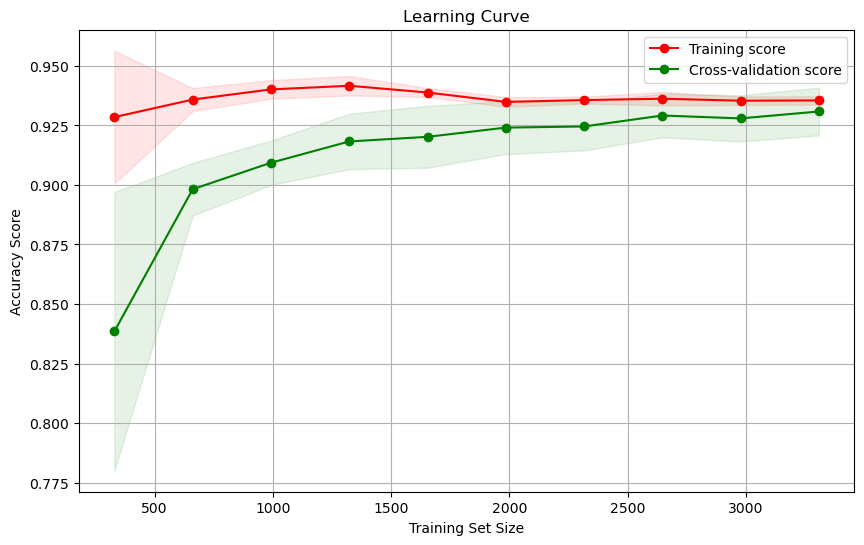

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Reuse the preprocessor and model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_val, y_train_val, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


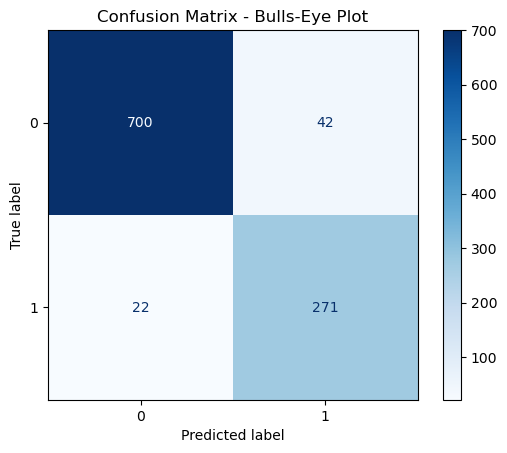

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model on the combined train + validation set
model.fit(X_train_val, y_train_val)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Bulls-Eye Plot")
plt.show()
